In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

#### Importing Sales Data

In [135]:
Sales = pd.read_csv(r'C:\Users\user\Desktop\Python Foundation Case Study 4 - Python Visualization Case Study\Case Study 4 - Python Visualizations Case Study\SalesData.csv')

In [136]:
Sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [137]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [138]:
Sales.loc[Sales.duplicated()]

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016


#### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [139]:
Sales_Region = Sales.groupby('Region')[['Sales2015','Sales2016']].sum()

In [140]:
Sales_Region

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


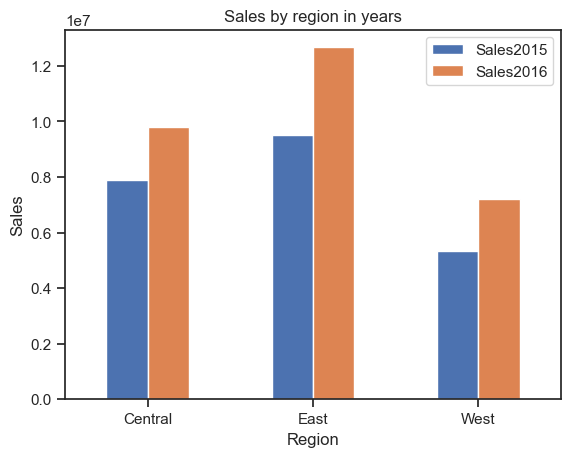

In [141]:
Sales_Region.plot(kind='bar')
plt.title('Sales by region in years')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

#### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [142]:
Sales_Region_2016 = Sales.groupby('Region')['Sales2016'].sum()/Sales.Sales2016.sum()*100

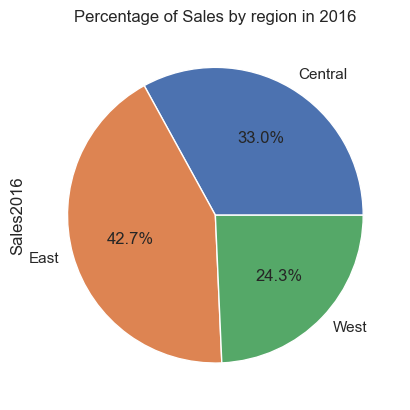

In [143]:
Sales_Region_2016.plot(kind='pie',autopct = '%.1f%%')
plt.title('Percentage of Sales by region in 2016')
plt.show()

#### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [144]:
Region_Tier = Sales.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum()

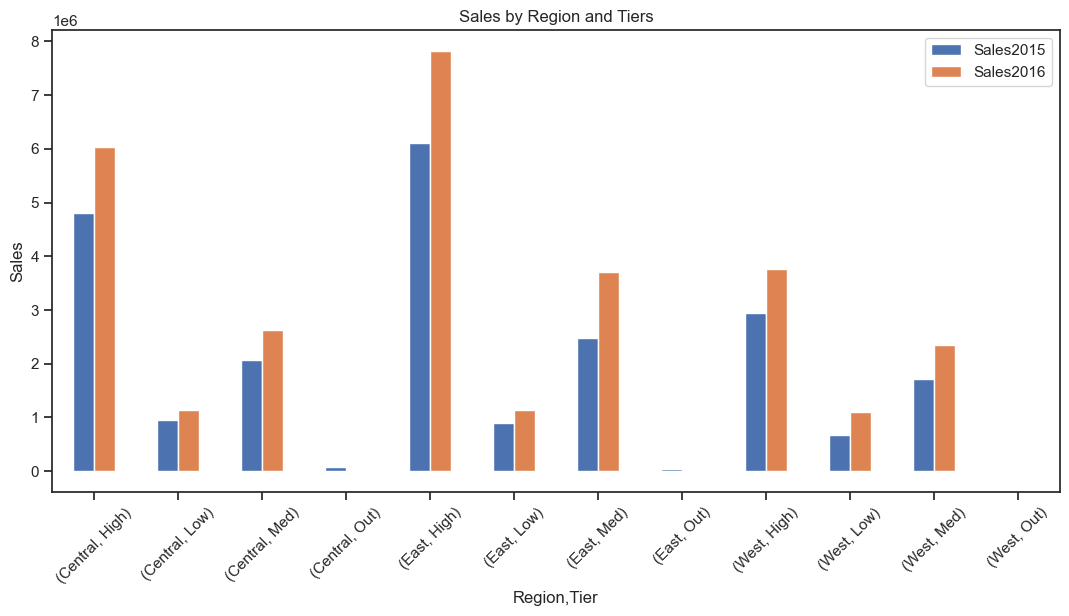

In [145]:

Region_Tier.plot(kind='bar',figsize=(13,6))
plt.title('Sales by Region and Tiers')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

#### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [146]:
East_Region = Sales.loc[Sales['Region']=='East']

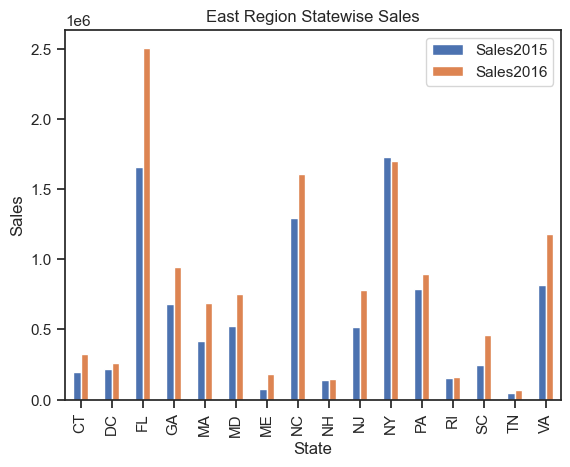

In [147]:
East_Region.groupby('State')[['Sales2015','Sales2016']].sum().plot(kind='bar')
plt.title('East Region Statewise Sales')
plt.ylabel('Sales')
plt.show()

In [93]:
# In East Region NY State registered a decline in 2016 compare to 2015

#### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [148]:
Tier_Division = Sales.loc[Sales['Tier']=='High']

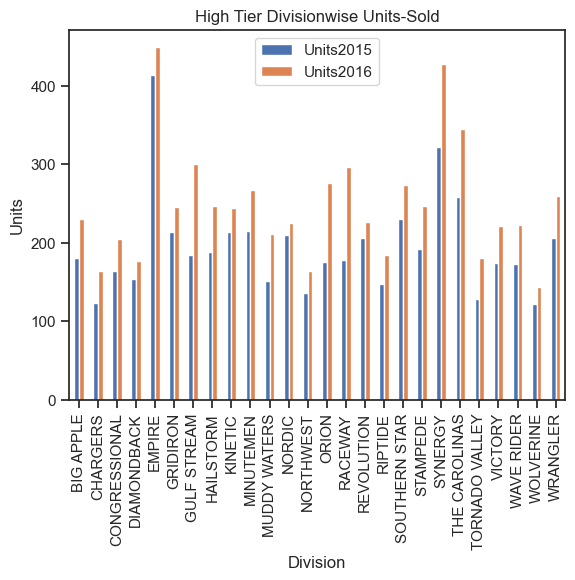

In [149]:
Tier_Division.groupby('Division')[['Units2015','Units2016']].sum().plot(kind='bar')
plt.title('High Tier Divisionwise Units-Sold')
plt.ylabel('Units')
plt.show()

In [94]:
# No Division saw a decline in number of units sold in 2016 compared to 2015

#### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -                • Jan - Mar : Q1 , • Apr - Jun : Q2 , • Jul - Sep : Q3 , • Oct - Dec : Q4

In [150]:
Sales['Qtr'] = np.where(Sales['Month'].isin(['Jan','Feb','Mar']),'Q1',np.where(Sales['Month'].isin(['Apr','May','Jun']),'Q2',np.where(Sales['Month'].isin(['Jul','Sep']),'Q3','Q4')))

In [152]:
Sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q4
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


#### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

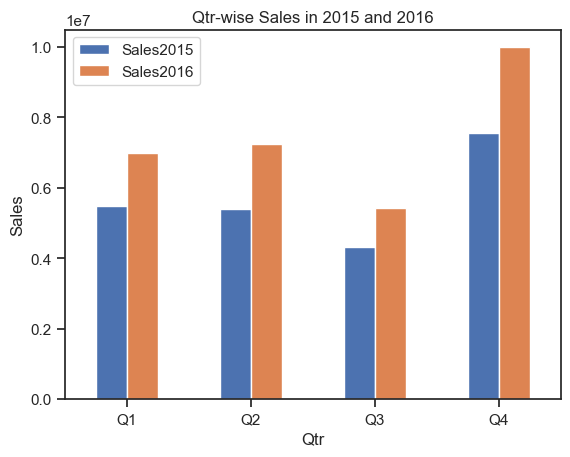

In [153]:
Sales.groupby('Qtr')[['Sales2015','Sales2016']].sum().plot(kind='bar')
plt.title('Qtr-wise Sales in 2015 and 2016')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

#### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.    (Draw 4 pie charts representing a Quarter for each Tier)


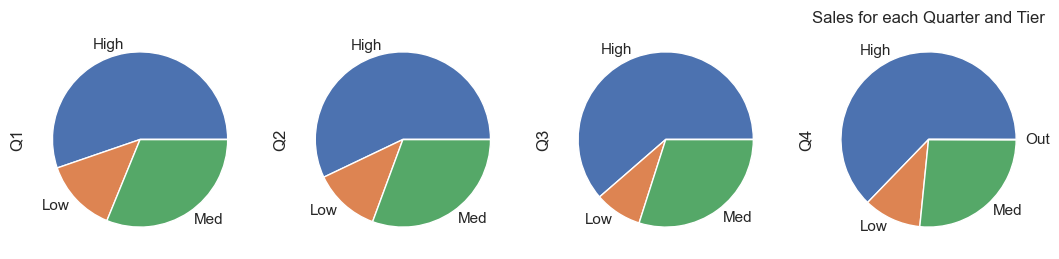

In [154]:
Sales.pivot_table(index='Tier',columns='Qtr',values='Sales2016',aggfunc ='sum').abs().plot(kind='pie',subplots=True,figsize = (13,6),legend=False)
plt.title('Sales for each Quarter and Tier',loc='center')
plt.show()